## Problem 3.2 - Ridge vs. LASSO

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split

### a) Solve minimization problem empirically

In [3]:
# defining lambda and the x and y values
lamda = 1
x = np.linspace(-1, 1, 101)
y_values = np.linspace(-1, 1, 9)
y_values

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [4]:
# solve the two minimization problems for ridge and lasso regression empirically
solutions_1 = []
solutions_2 = []

for y in y_values:
    # argmin of (y-x)^2 + lambda * x^2  (Ridge)
    idx_1 = np.argmin((y - x) ** 2 + lamda * x ** 2)
    solutions_1.append(x[idx_1])

    # argmin of (y-x)^2 + lambda * |x|  (Lasso)
    idx_2 = np.argmin((y - x) ** 2 + lamda * np.abs(x))
    solutions_2.append(x[idx_2])

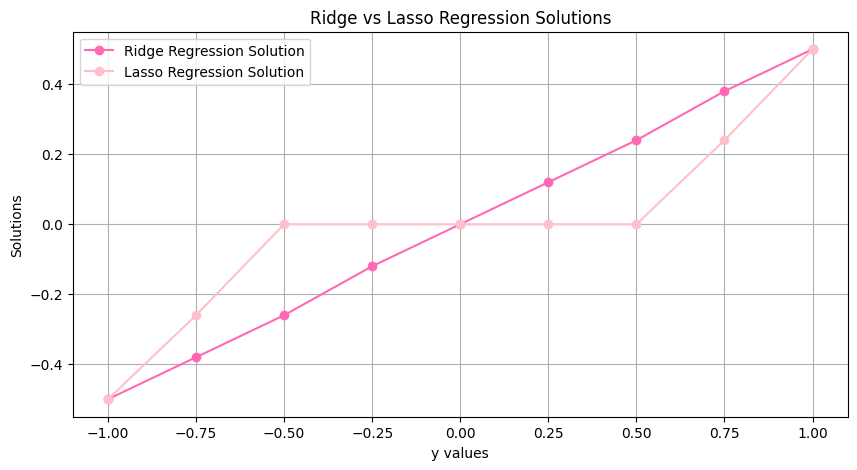

In [5]:
# plot the solution depending on y for both methods

plt.figure(figsize=(10, 5))
plt.plot(y_values, solutions_1, label = 'Ridge Regression Solution', marker = 'o', color = 'hotpink')
plt.plot(y_values, solutions_2, label = 'Lasso Regression Solution', marker = 'o', color = 'pink')
plt.xlabel('y values')
plt.ylabel('Solutions')
plt.title('Ridge vs Lasso Regression Solutions')
plt.legend()
plt.grid()
plt.show()


Observations:  
1. Ridge Regression:  
- Linear in y
- when $\lambda$ -> 0, then x -> y
- when $\lambda$ -> $\infty$, then x -> 0

2. LASSO:
- if y > $\lambda$/2, then x = y - $\lambda$/2
- if y < -$\lambda$/2, then x = y + $\lambda$/2
- if y $\in [-\lambda/2 , \lambda/2]$, then x = 0


### b) Ridge and LASSO on breast cancer dataset

In [6]:
# load dataset and split into training and test set
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# take a look at the given dataset
dataframe_bc = pd.DataFrame(X, columns = load_breast_cancer().feature_names)
display(dataframe_bc.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### (i) Ridge Regression - scores

In [13]:
# printing the scores for Ridge Regression (inspired by Guido/Müller)
lambdas = list(np.power(10.0, np.arange(-6, 2)))
for l in lambdas:
    ridge = Ridge(alpha = l, fit_intercept = False).fit(X_train, y_train)
    print("Ridge Regression for lambda = {:.0e}:".format(l))
    print("Training set score: {}".format(ridge.score(X_train, y_train)))
    print("Test set score: {}\n".format(ridge.score(X_test, y_test)))

Ridge Regression for lambda = 1e-06:
Training set score: 0.757491089241121
Test set score: 0.7033742785846746

Ridge Regression for lambda = 1e-05:
Training set score: 0.7574899464207205
Test set score: 0.7035417062739415

Ridge Regression for lambda = 1e-04:
Training set score: 0.7574010790116863
Test set score: 0.7049924551089235

Ridge Regression for lambda = 1e-03:
Training set score: 0.7545785220158949
Test set score: 0.7105439708059433

Ridge Regression for lambda = 1e-02:
Training set score: 0.7389459963599623
Test set score: 0.7086809478161529

Ridge Regression for lambda = 1e-01:
Training set score: 0.7179212646194788
Test set score: 0.7028272380039526

Ridge Regression for lambda = 1e+00:
Training set score: 0.6774420612877059
Test set score: 0.6745144200619788

Ridge Regression for lambda = 1e+01:
Training set score: 0.6360471897358837
Test set score: 0.6406049766504773



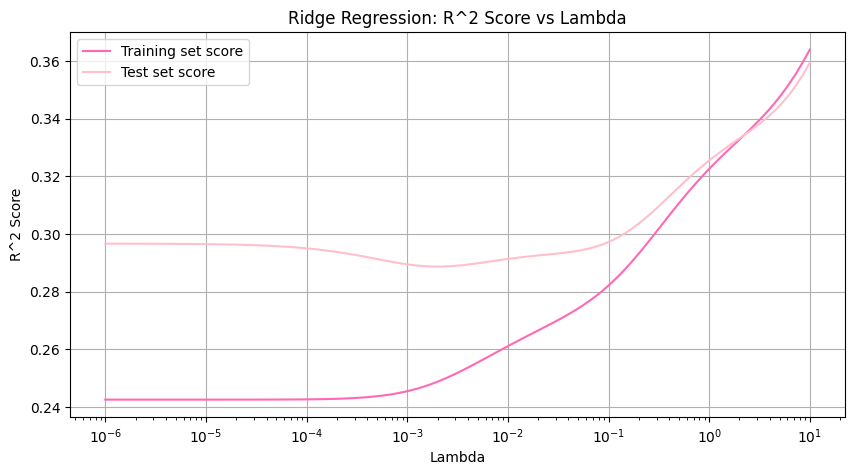

In [23]:
# testing different lambdas for Ridge Regression and plot scores 
lambdas = np.power(10, np.linspace(-6, 1, 100))
train_scores = []
test_scores = []
for l in lambdas:
    ridge = Ridge(alpha = l, fit_intercept = False).fit(X_train, y_train)
    train_scores.append(1 - ridge.score(X_train, y_train))
    test_scores.append(1 - ridge.score(X_test, y_test)) 

plt.figure(figsize=(10, 5))
plt.semilogx(lambdas, train_scores, label = 'Training set score', color = 'hotpink')
plt.semilogx(lambdas, test_scores, label = 'Test set score', color = 'pink')
plt.xlabel('Lambda')
plt.ylabel('R^2 Score')
plt.title('Ridge Regression: R^2 Score vs Lambda')
plt.legend()
plt.grid()
plt.show() 


In [24]:
# values inspired by Guido/Müller
ridge = Ridge(alpha = 1, fit_intercept = False).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha = 10, fit_intercept = False).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge001 = Ridge(alpha = 0.01, fit_intercept = False).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge001.score(X_test, y_test)))

Training set score: 0.68
Test set score: 0.67
Training set score: 0.64
Test set score: 0.64
Training set score: 0.74
Test set score: 0.71


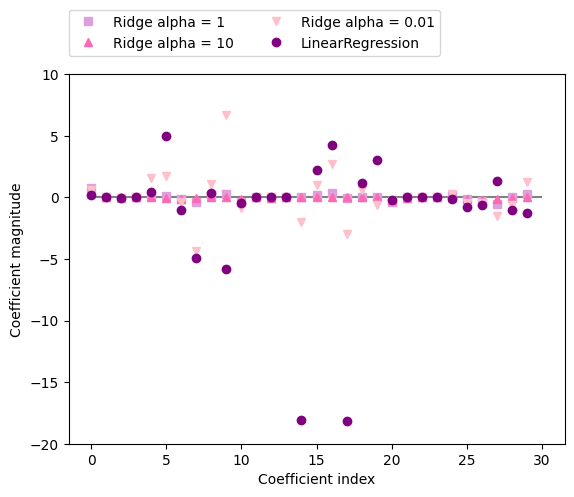

In [25]:
lr = LinearRegression().fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1", color = 'plum')
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10", color = 'hotpink')
plt.plot(ridge001.coef_, 'v', label = "Ridge alpha = 0.01", color = 'pink')

plt.plot(lr.coef_, 'o', label = "LinearRegression", color = 'purple')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_), color = 'gray', zorder = 0)
plt.ylim(-20, 10)
plt.legend(ncol = 2, loc = (0, 1.05))
plt.show()

#### (ii) LASSO Regression

In [26]:
# printing the scores for Lasso Regression (inspired by Guido/Müller)
lambdas = list(np.power(10.0, np.arange(-6, 2)))
for l in lambdas:
    lasso = Lasso(alpha = l, max_iter = 100000, fit_intercept = False).fit(X_train, y_train)
    print("Ridge Regression for lambda = {:.0e}:".format(l))
    print("Training set score: {}".format(1 - lasso.score(X_train, y_train)))
    print("Test set score: {}\n".format(1 - lasso.score(X_test, y_test)))

c:\Users\xandi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+01, tolerance: 2.860e-02
  model = cd_fast.enet_coordinate_descent(


Ridge Regression for lambda = 1e-06:
Training set score: 0.24252154682561433
Test set score: 0.2958826738277329



c:\Users\xandi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.228e+01, tolerance: 2.860e-02
  model = cd_fast.enet_coordinate_descent(


Ridge Regression for lambda = 1e-05:
Training set score: 0.24350757015931013
Test set score: 0.28701130399829444



c:\Users\xandi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.485e+00, tolerance: 2.860e-02
  model = cd_fast.enet_coordinate_descent(


Ridge Regression for lambda = 1e-04:
Training set score: 0.25978480034582707
Test set score: 0.277958180102176

Ridge Regression for lambda = 1e-03:
Training set score: 0.3294075823390824
Test set score: 0.3261486861658617

Ridge Regression for lambda = 1e-02:
Training set score: 0.3889684675186281
Test set score: 0.38722297622791413

Ridge Regression for lambda = 1e-01:
Training set score: 0.5104187098247098
Test set score: 0.4923327544279158

Ridge Regression for lambda = 1e+00:
Training set score: 0.6376950575821666
Test set score: 0.5750076312834657

Ridge Regression for lambda = 1e+01:
Training set score: 1.250282090741868
Test set score: 1.225233044220983



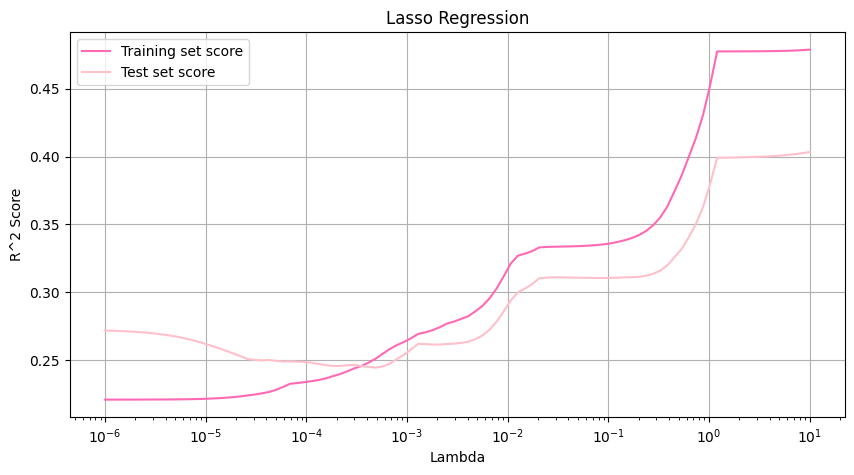

In [28]:
lambdas = np.power(10,np.linspace(-6,1,100))
train_scores = []
test_scores = []
for l in lambdas:
    lasso = Lasso(l, max_iter = 100000).fit(X_train, y_train)
    train_scores.append(1 - lasso.score(X_train, y_train))
    test_scores.append(1 - lasso.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.semilogx(lambdas, train_scores, label = 'Training set score', color = 'hotpink')
plt.semilogx(lambdas, test_scores, label = 'Test set score', color = 'pink')
plt.xlabel('Lambda')
plt.ylabel('R^2 Score')
plt.title('Lasso Regression')
plt.legend()
plt.grid()
plt.show()

Ridge is a more restricted model that linear Regression and less likely to overfit the data, which results in a lower performance on training data but a better general performance. The relation of simplicity and training performace is regulated by alpha. The higher alpha, the more the coefficients are moved towards zero (decreases training performance but might increase generalization). When alpha decreases the coefficients are less restricted and we resemble the linear regression model.

In [30]:
# values inspired by Guido/Müller
lasso = Lasso().fit(X_train, y_train)
print("Lasso Regression for lambda = 1:")
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}\n".format(np.sum(lasso.coef_ != 0)))

lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("Lasso Regression for lambda = 0.01:")
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}\n".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("Lasso Regression for lambda = 0.0001:")
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Lasso Regression for lambda = 1:
Training set score: 0.55
Test set score: 0.62
Number of features used: 3

Lasso Regression for lambda = 0.01:
Training set score: 0.68
Test set score: 0.71
Number of features used: 8

Lasso Regression for lambda = 0.0001:
Training set score: 0.77
Test set score: 0.75
Number of features used: 22


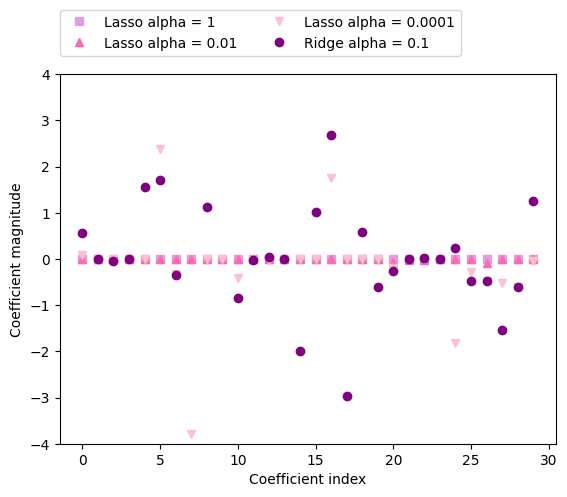

In [31]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1", color = 'plum')
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01", color = 'hotpink')
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001", color = 'pink')
plt.plot(ridge001.coef_, 'o', label = "Ridge alpha = 0.1", color = 'purple')
plt.legend(ncol = 2, loc = (0, 1.05))
plt.ylim(-4, 4)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

The Lasso model has a regularization parameter alpha, that controls how much the coefficients are pushed to zero. A lower alpha value allows us to fit a more complex model whose performance is best on the training and on the test set. Lasso also works as a feature selection tool. We also have to be carful to not choose alpha too small since we possilbly overfit.  
For alpha = 1 we see that most of the coefficients are 0 or very small. With decrasing alpha the coefficients also take larger values. 

Comparing Lasso with Ridge yiels somewhat similar results for Ridge with alpha = 0.1 and Lasso with alpha = 0.0001 which also fits the observations of the book "Introduction to Machine Learning" by Guido and Müller.